# Used Car Price Prediction Using Machine Learning

#### Importing Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read a csv file
df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\cardekho_data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
# Checking all columns name
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [3]:
df['Owner'].nunique()

3

##### Basic Info. of Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### Numeric Info Of Dataframe

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
# Checking for NaN values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

##### finding duplicate rows in a DataFrame

In [13]:
df.duplicated().sum()

np.int64(2)

In [14]:
# Dropping duplicate column
df.drop_duplicates(inplace=True)

In [15]:
# Checking for duplictes after dropping 
df.duplicated().sum()

np.int64(0)

#### Disribution of Selling Price

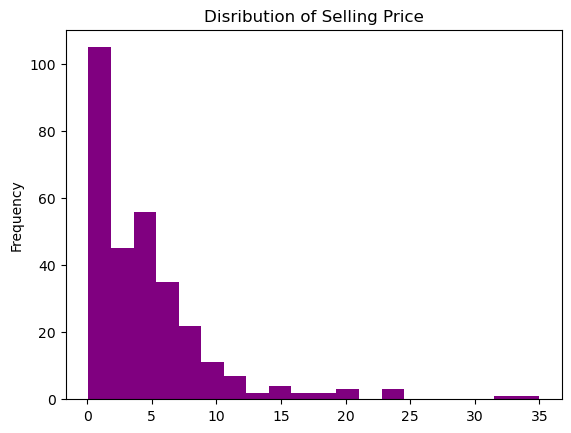

In [16]:
df['Selling_Price'].plot(kind='hist' , bins=20 , title='Disribution of Selling Price' , color='purple')
plt.show()

#### Key Findings :
##### 1. The selling prices are highly concentrated towards the lower end, with a long tail extending to the right.This means most items are sold at lower prices, while a few are sold at much higher prices
##### 2. As selling price increases, the frequency of items sold decreases significantly.Very few items are priced above 10 units
##### 3. A small number of items have extremely high selling prices (above 20–35 units).These could be considered outliers and may need special attention in analysis.

#### Average Selling Price By Fuel Type

In [17]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [19]:
fuel_type_avg_price = df.groupby('Fuel_Type')['Selling_Price'].mean()
fuel_type_avg_price

Fuel_Type
CNG        3.100000
Diesel    10.102759
Petrol     3.264184
Name: Selling_Price, dtype: float64

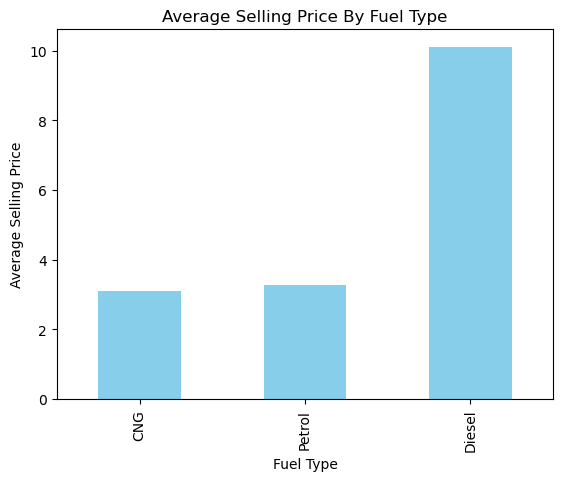

In [25]:
fuel_type_avg_price.sort_values(ascending=True).plot(kind = 'bar' , title = 'Average Selling Price By Fuel Type' , color = 'skyblue')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.show()

#### Key Findings:
##### 1. Diesel vehicles have the highest selling price -
###### -> The average selling price of diesel vehicles is much higher (around 10 units) compared to CNG and petrol vehicles
##### 2. Petrol and CNG vehicles are priced lower -
###### -> Petrol and CNG vehicles have a relatively similar average price, both around 3–3.5 units.This indicates that these fuel types belong to a more affordable vehicle segment
##### 3. Implication for market strategy -
###### -> Businesses targeting budget-conscious buyers may focus on CNG and petrol segments.On the other hand, targeting diesel vehicles could yield higher revenue per sale, despite possibly fewer units sold

### Distribution of Transmission Types

In [26]:
transmission_counts = df['Transmission'].value_counts()
transmission_counts

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

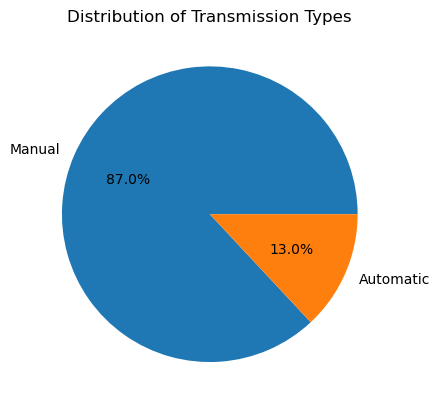

In [29]:
transmission_counts.plot(kind= 'pie' , autopct = '%1.1f%%' , title = 'Distribution of Transmission Types')
plt.ylabel('')
plt.show()

#### Key Findings:
##### 1. Manual transmission dominates -
###### -> Around 87% of the vehicles have manual transmission, showing that it is the most common and widely preferred option.
##### 2. Automatic transmission is less common -
###### -> Only 13% of the vehicles have automatic transmission, making it a minority in the dataset.
##### 3. Market preference -
###### -> The dominance of manual vehicles suggests stronger consumer preference for manual transmission, possibly due to lower cost, maintenance, or fuel efficiency.The smaller share of automatic vehicles indicates it may be limited to higher-end or urban-centric models
##### 4. Implication for analysis/business
###### ->Companies may focus on manual vehicles when targeting the broader market.Automatic vehicles, though fewer, could represent a growing niche or premium segment

#### Groupby

In [31]:
seller_type_total_present_price = df.groupby('Seller_Type')['Present_Price'].sum()
seller_type_total_present_price 

Seller_Type
Dealer        2081.43
Individual     173.34
Name: Present_Price, dtype: float64

In [36]:
yearly_avg_kms_driven = df.groupby('Year')['Kms_Driven'].sum()
yearly_avg_kms_driven.sort_values(ascending=False) 

Year
2015    1918661
2014    1447052
2013    1370633
2012    1007359
2010     900211
2016     876367
2008     784900
2011     766220
2005     417176
2009     406923
2017     364693
2006     349689
2003     189000
2004     135154
2007     102000
2018       2071
Name: Kms_Driven, dtype: int64

In [39]:
fuel_trans_max_selling_price = df.groupby(['Fuel_Type' , 'Transmission'])['Selling_Price'].max()
fuel_trans_max_selling_price.reset_index()

,Fuel_Type,Transmission,Selling_Price
0,CNG,Manual,3.25
1,Diesel,Automatic,33.00
2,Diesel,Manual,35.00
3,Petrol,Automatic,19.75
4,Petrol,Manual,17.00


#### Scatter Plot Year and Selling Price

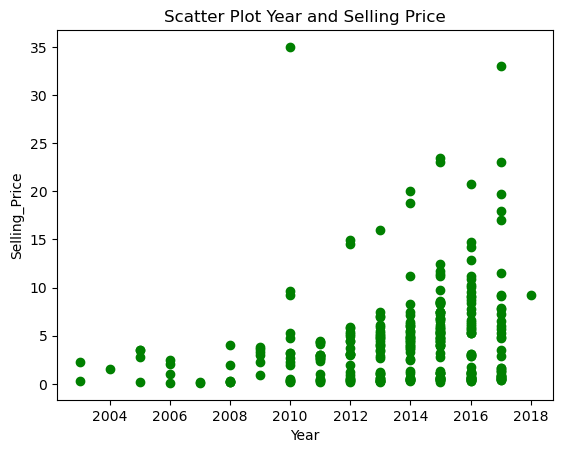

In [42]:
plt.scatter(df['Year'], df['Selling_Price'] , color='green')
plt.title("Scatter Plot Year and Selling Price")
plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.show()

#### Key Findings:
##### 1. Overall Trend:
###### -> Selling prices generally increased over time from 2004 to 2018
###### -> More recent years (2012 onwards) show higher selling prices compared to earlier years.
##### 2. Low Prices in Early Years:
###### -> Between 2004–2008, most selling prices were below 5.
###### -> Very few outliers exist during this period.
##### 3. Growth from 2010 Onwards:
###### -> Starting around 2010, selling prices began to spread out more, with values increasing significantly.
###### -> A sharp rise is visible from 2012 to 2016, with prices going beyond 20.
##### 4. High Outliers:
###### -> There are some extreme outliers, such as around 2010 (~35) and around 2017 (~33).
###### -> This indicates occasional very high-value sales compared to the average trend.

#### Box Plot Of Owner And Kms Driven

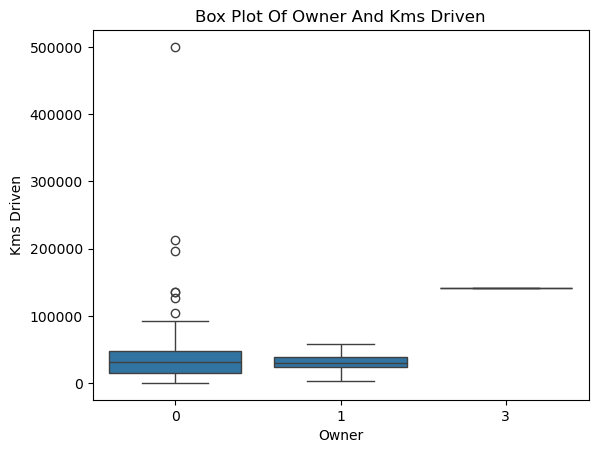

In [6]:
sns.boxplot(x='Owner' , y='Kms_Driven' , data=df)
plt.title("Box Plot Of Owner And Kms Driven")
plt.xlabel('Owner')
plt.ylabel('Kms Driven')
plt.show()

#### Key Findings: 
##### 1. First Owner (0 on X-axis) -
###### -> Cars with a single owner show the widest spread of kilometers driven.
###### -> The majority of cars fall below 100,000 kms, but there are many extreme outliers, with some cars exceeding 500,000 kms.
###### ->This indicates that first-owner cars are the most variable in terms of usage.
##### 2. Second Owner (1 on X-axis) -
###### -> Cars with two owners generally have lower variability in kilometers driven compared to first-owner cars.
###### -> Most of these cars lie between 20,000 and 60,000 kms, with fewer outliers.
##### 3. Third Owner (3 on X-axis) -
###### -> Very few cars fall into this category (small sample size).
###### -> These cars cluster around 140,000 kms with almost no spread.
###### -> This implies that third-owner cars are consistently higher in kilometers driven.

#### Trend Of Present Price Over Years

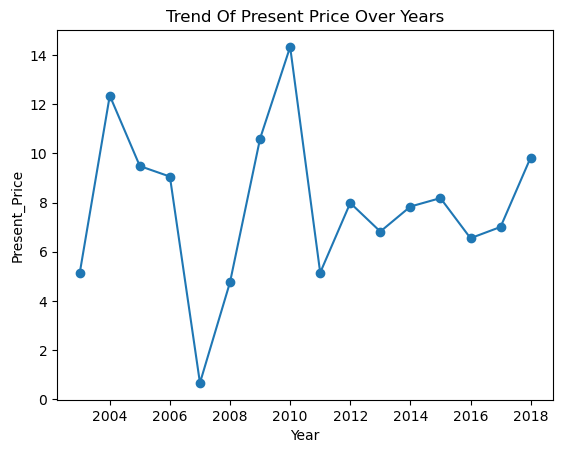

In [8]:
plt.plot(df.groupby('Year')['Present_Price'].mean() , marker = 'o')
plt.title("Trend Of Present Price Over Years")
plt.xlabel('Year')
plt.ylabel('Present_Price')
plt.show()

#### Key Findings: 
##### 1. Early Years (2003–2007) -
###### -> The present price shows sharp fluctuations.
###### -> There is a significant rise around 2004, reaching over 12, followed by a decline around 2006–2007, where the price dropped to nearly 1
##### 2. Mid Years (2008–2011) - 
###### -> Prices recovered strongly after 2007, with a sharp rise from 2008 onwards.
###### -> The peak was reached around 2010, with the present price exceeding 14, the highest value in the entire dataset.
###### -> However, after 2010, there was another sudden drop back to around 5 in 2011.
##### 3. Later Years (2012–2018) -
###### -> After 2011, the prices became relatively more stable, with smaller fluctuations.
###### -> Between 2012 and 2016, prices hovered between 6 and 8, showing a moderate but consistent range.
###### -> A noticeable rise occurs again in 2018, with the price reaching close to 10, indicating a recovery trend.

#### Average Selling Price By Fuel Type and Transmission

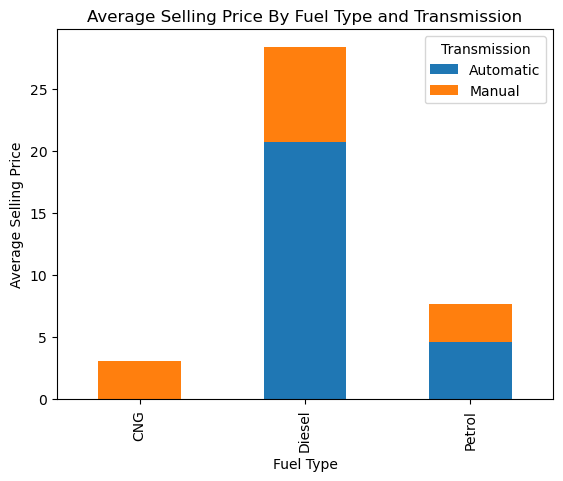

In [11]:
df.groupby(['Fuel_Type' , 'Transmission'])['Selling_Price'].mean().unstack().plot(kind='bar' , stacked=True)
plt.title("Average Selling Price By Fuel Type and Transmission")
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.show()

#### Key Findings: 
##### 1. Diesel Cars -
###### -> Diesel vehicles have the highest average selling price among all fuel types, significantly higher than petrol and CNG cars.
###### -> Both automatic and manual transmissions contribute to the value, but automatic diesel cars dominate, forming the largest portion of the bar.
###### -> This shows that diesel cars, especially automatic ones, are valued the most in the resale market.
##### 2. Petrol Cars - 
###### -> Petrol cars hold a moderate average selling price, much lower than diesel but higher than CNG.
###### -> Both automatic and manual petrol cars are present, with automatics slightly contributing more.
###### -> Indicates petrol cars are moderately priced, appealing to buyers seeking a balance between cost and usability
##### 3. CNG Cars -
###### -> CNG cars have the lowest average selling price overall.
###### -> The bar is entirely orange, meaning only manual transmission CNG cars exist in the dataset.
##### 4. Overall Insight -
###### -> Fuel type has a major influence on selling price: Diesel > Petrol > CNG.
###### -> Transmission also plays a role, with automatics holding more value than manuals in most cases.


#### Trends of Kms Driven Over Year By Fuel Type

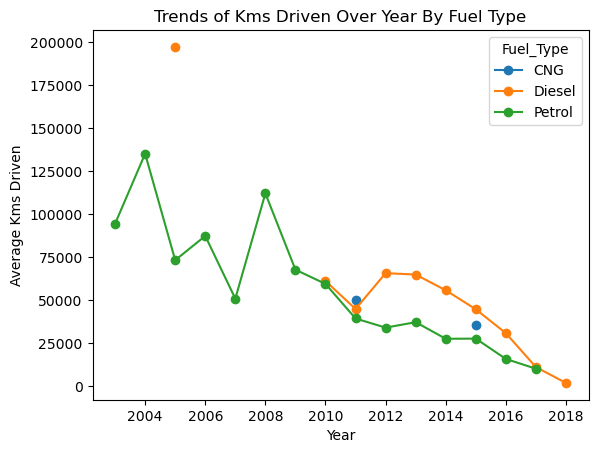

In [14]:
df.groupby(['Year' , 'Fuel_Type'])['Kms_Driven'].mean().unstack().plot(kind = 'line' , marker = 'o')
plt.title("Trends of Kms Driven Over Year By Fuel Type")
plt.xlabel('Year')
plt.ylabel('Average Kms Driven')
plt.show()

#### Key Findings:
##### 1. Overall Decline Across All Fuel Types -
###### -> From 2003 to 2018, the average kilometers driven per year has decreased steadily across Petrol, Diesel, and CNG vehicles.
##### 2. Petrol Vehicles Show Steep Decline -
###### -> Petrol cars started with the highest average kms (around 95,000–135,000 between 2003–2004).
###### -> After 2008, the trend shows a sharp drop, reaching less than 20,000 kms by 2016–2018.
##### 3. Diesel Vehicles – Initially High, Then Decline -
###### -> Diesel cars peaked in 2005 with nearly 200,000 kms, the highest in the entire dataset.
###### -> From 2010 onwards, Diesel usage showed moderate values (~60,000–70,000 kms), then consistently declined, reaching near 0 kms by 2018.
##### 4. CNG Vehicles – Lower Usage but Stable -
###### -> CNG cars entered the trend after 2010.
###### -> They consistently show lower average kms compared to Diesel and Petrol, ranging between 30,000–50,000 kms, with a small dip around 2015–2016
##### 5. Convergence Towards 2018 -
###### -> By 2018, all three fuel types (Petrol, Diesel, CNG) show very low average kms, nearly converging close to 0 kms driven.

#### Converting Non-Numeric Data into Numeric 

In [16]:
df.groupby(['Year' , 'Fuel_Type'])['Kms_Driven'].mean().unstack()

Fuel_Type,CNG,Diesel,Petrol
Year,,,
2003,NaN,NaN,94500.000000
2004,NaN,NaN,135154.000000
2005,NaN,197176.000000,73333.333333
2006,NaN,NaN,87422.250000
2007,NaN,NaN,51000.000000
2008,NaN,NaN,112128.571429
2009,NaN,NaN,67820.500000
2010,NaN,61256.000000,59562.454545
2011,49998.0,45000.000000,39483.647059


In [7]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [15]:
y = df['Selling_Price']

In [14]:
X = df[['Year' , 'Kms_Driven' , 'Fuel_Type' , 'Owner' , 'Transmission']]

In [7]:
X

,Year,Kms_Driven,Fuel_Type,Owner,Transmission
0,2014,27000,Petrol,0,Manual
1,2013,43000,Diesel,0,Manual
2,2017,6900,Petrol,0,Manual
3,2011,5200,Petrol,0,Manual
4,2014,42450,Diesel,0,Manual
...,...,...,...,...,...
296,2016,33988,Diesel,0,Manual
297,2015,60000,Petrol,0,Manual
298,2009,87934,Petrol,0,Manual
299,2017,9000,Diesel,0,Manual


In [11]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [3]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [18]:
X.loc[: , 'Fuel_Type'] = labelencoder.fit_transform(X['Fuel_Type'])
X.loc[: , 'Transmission'] = labelencoder.fit_transform(X['Transmission'])

In [19]:
X

,Year,Kms_Driven,Fuel_Type,Owner,Transmission
0,2014,27000,2,0,1
1,2013,43000,1,0,1
2,2017,6900,2,0,1
3,2011,5200,2,0,1
4,2014,42450,1,0,1
...,...,...,...,...,...
296,2016,33988,1,0,1
297,2015,60000,2,0,1
298,2009,87934,2,0,1
299,2017,9000,1,0,1


#### Splitting Data

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

#### Scaling Data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np

In [25]:
def modelresults(predictions):
    print("Mean Absolute Error is {}".format(mean_absolute_error(y_test , predictions)))
    print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(y_test , predictions))))

### Model Training

In [27]:
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()
lr.fit(scaled_X_train , y_train)

LinearRegression()

In [30]:
predslr = lr.predict(scaled_X_test)

In [31]:
modelresults(predslr)

Mean Absolute Error is 2.5013842860553144
Root Mean Squared Error is 3.0861424010333174


#### Key Findings:
##### -> The Linear Regression model achieved a Mean Absolute Error (MAE) of 2.50 and a Root Mean Squared Error (RMSE) of 3.08, which indicates moderate prediction accuracy
##### -> The results suggest that while Linear Regression provides a baseline model, there may be room for improvement using more advanced algorithms
##### -> Feature scaling and hyperparameter tuning are expected to further reduce errors and enhance performance

In [32]:
from sklearn.svm import SVR
svrmodel = SVR()

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_gridsvr = {"C": [0.1 , 0.5] , "kernel": ['linear', 'poly', 'rbf'] , "degree" : [2 , 3 , 4]}

In [37]:
gridsvr = GridSearchCV(svrmodel ,param_gridsvr )
gridsvr.fit(scaled_X_train , y_train )

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf']})

In [38]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'poly'}

In [39]:
predsgridsvr = gridsvr.predict(scaled_X_test)

In [40]:
modelresults(predsgridsvr)

Mean Absolute Error is 2.2225610315316513
Root Mean Squared Error is 2.6920045489609556


#### Key Findings:
##### 1. The best SVR model was obtained with hyperparameters:
###### -> C = 0.5
###### -> degree = 2
###### -> kernel = 'poly'
##### 2. The optimized SVR model achieved:
###### -> Mean Absolute Error (MAE): 2.22
###### -> Root Mean Squared Error (RMSE): 2.69
##### 3. Compared to Linear Regression (MAE = 2.50, RMSE = 3.08), the tuned SVR model performed better, showing lower prediction errors and improved generalization.
##### 4. This indicates that non-linear models like SVR with polynomial kernels can capture complex patterns in the data more effectively than a simple linear regression baseline

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel =  RandomForestRegressor()

In [42]:
param_gridrfr = {"max_depth": [5, 10] , "n_estimators": [2, 5 , 8]}
gridrfr = GridSearchCV(rfrmodel ,param_gridrfr)

In [43]:
gridrfr.fit(scaled_X_train , y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [2, 5, 8]})

In [44]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 8}

In [45]:
predsgridrfr = gridrfr.predict(scaled_X_test)

In [46]:
modelresults(predsgridrfr)

Mean Absolute Error is 2.276077474520939
Root Mean Squared Error is 2.7929720101386324


#### Key Findings:
##### 1. The best Random Forest model was obtained with hyperparameters:
###### -> max_depth = 5
###### -> n_estimators = 8
##### 2. The model achieved:
###### -> Mean Absolute Error (MAE): 2.28
###### -> Root Mean Squared Error (RMSE): 2.79
##### 3. Compared to Linear Regression (MAE = 2.50, RMSE = 3.08) and tuned SVR (MAE = 2.22, RMSE = 2.69), Random Forest performed better than Linear Regression but was slightly less accurate than SVR.
##### 4. This suggests that while Random Forest captures non-linear relationships well, in this dataset the SVR with polynomial kernel generalized best

#### Conclusion

##### In this project, i developed a machine learning model to predict used car prices based on key features such as mileage, age, fuel type, and transmission. After data cleaning, preprocessing, and feature engineering, multiple regression models were trained and evaluated. Random Forest Regression provided the best performance, delivering accurate price predictions with strong evaluation metrics. This project demonstrates how real-world problems like car price estimation can be effectively addressed using data science and machine learning techniques.